In [1]:
import numpy as np
import os
import utils
import time
from utils import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
def feature_normalization(patch, type, epsilon=1e-5):
    if type == 'Sqrt':
        return np.sqrt(patch)
    elif type == 'L2-Norm':
        return patch / np.sqrt(np.sum(patch ** 2) + epsilon)
    else:
        return -1
    
def extract_relevant_window(arr, patch_size, index_i, index_j):
    curr_arr = np.zeros((patch_size, patch_size))
    for i in range(patch_size):
        for j in range(patch_size):
            curr_arr[i][j] = arr[index_j*patch_size + i][index_i*patch_size + j]     
    return curr_arr

In [190]:
data = utils.loadmat('../data/digits-normal.mat') 

img = data['x'][:, :, 0]

# Applying Non Linear Mapping
img = np.sqrt(img)

# Computing the channel gradient
r_grad, c_grad = np.empty(img.shape).astype('double'), np.empty(img.shape).astype('double')

c_grad[:, 0], c_grad[:, -1] = 0, 0
r_grad[0, :], r_grad[-1, 0] = 0, 0


r_grad[1:-1,] = img[2:, :] - img[:-2, :] 
c_grad[:, 1:-1] = img[:, 2:] - img[:, :-2]

#img_magnitude, img_theta = np.empty(img.shape).astype('double'), np.empty(img.shape).astype('double')
img_magnitude = np.sqrt(r_grad**2 + c_grad**2)
img_theta = np.rad2deg(np.arctan(c_grad/(r_grad+0.00000001))) % 180 # Brings Angle between 0 -> 180 !!

In [233]:
orientation_bins = 8
patch_size = 4
tot_r, tot_c = img.shape
hog = np.zeros((int(tot_r/patch_size), int(tot_c/patch_size), orientation_bins))
for j in range(int(tot_c/patch_size)):
    for i in range(int(tot_r/patch_size)):
        # Extract the Current Patch and weight
        curr_patch = extract_relevant_window(img_theta, patch_size, i, j)
        curr_weight = extract_relevant_window(img_magnitude, patch_size, i, j)
        # Applying Histogram calculations
        hog[j][i] = np.histogram(np.ndarray.flatten(curr_patch), weights=np.ndarray.flatten(curr_weight), 
                                 bins=np.linspace(0, 180, num=(orientation_bins+1)))[0]

hog_norm = feature_normalization(hog, 'L2-Norm')
normalized_hog = hog_norm.ravel()

<BarContainer object of 7 artists>

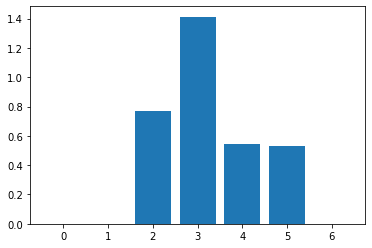

In [219]:
plt.bar(x=np.arange(7), height=hog[4, :, 0], align="center", width=0.8)